In [1]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\Lenovo\Desktop\Machine Learning\DATA SCIENCE PROJECTS\Pandas-Data-Science-Tasks-master


In [2]:
#concating all csv files to a single csv file
import pandas as pd
import os
directory = './SalesAnalysis/Sales_Data'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
dfs = []
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.to_csv('./SalesAnalysis/Sales_Data/merged_sales.csv', index=False)
merged_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#finding the NAN values
nan_values = merged_df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


Columns with NaN values:
Order ID            9810
Product             9810
Quantity Ordered    9810
Price Each          9810
Order Date          9810
Purchase Address    9810
dtype: int64


In [4]:
rows_with_nan = merged_df[merged_df.isna().any(axis=1)]
rows_with_nan.head()
merged_df = merged_df.dropna(how='all')
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
merged_df=merged_df[merged_df["Order Date"].str[0:2]!="Or"]
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
merged_df["Quantity Ordered"]=pd.to_numeric(merged_df["Quantity Ordered"])
merged_df["Price Each"]=pd.to_numeric(merged_df["Price Each"])

## ADDING A MONTH COLUMN.


In [7]:
merged_df["Month"]=merged_df["Order Date"].str[0:2]
merged_df["Month"]=merged_df["Month"].astype("int32")
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding another column for sales seperate by my multiplying Quantity Ordered and price each.

In [8]:
merged_df["Sales"]=merged_df["Quantity Ordered"].astype("int")*merged_df["Price Each"].astype("float")
merged_df.groupby(["Month"]).sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\34251642.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(["Month"]).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,196254,32611830.84,32800621.14
2,242082,39399924.96,39636403.56
3,306090,50241740.94,50527806.84
4,370044,60618078.36,61032064.32
5,336006,56432252.34,56746921.50
6,274554,46116460.98,46400440.68
7,289296,47385712.08,47659963.68
8,242064,40146217.56,40400421.84
9,235962,37529857.62,37756082.34


### Adding another city column 


In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

merged_df['City'] = merged_df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Which Month had the best Sales


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\2710721096.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,merged_df.groupby(["Month"]).sum()["Sales"])


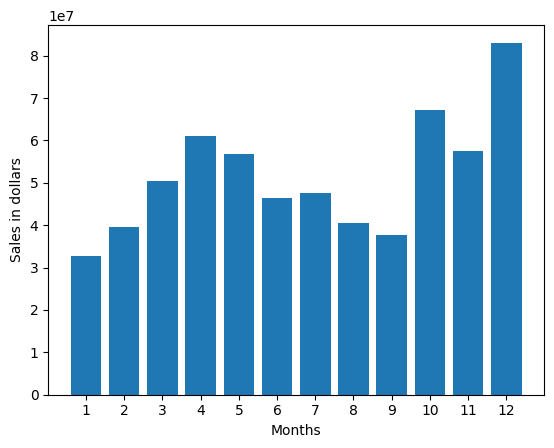

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

months=range(1,13)
plt.bar(months,merged_df.groupby(["Month"]).sum()["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in dollars")
plt.show()

### Which City had the best Sales




In [11]:
merged_df.groupby(["City"]).sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\3343765636.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(["City"]).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),298836,5.003835e+07,1886292,5.031897e+07
Austin (TX),200754,3.257772e+07,1256922,3.275247e+07
Boston (MA),405504,6.547338e+07,2540016,6.590956e+07
Dallas (TX),301140,4.954730e+07,1883160,4.982356e+07
Los Angeles (CA),599202,9.758583e+07,3749850,9.814627e+07
New York City (NY),502776,8.343667e+07,3163338,8.395771e+07
Portland (ME),49500,8.049406e+06,308592,8.095649e+06
Portland (OR),203454,3.349005e+07,1271178,3.367318e+07
San Francisco (CA),904302,1.478063e+08,5679360,1.487197e+08


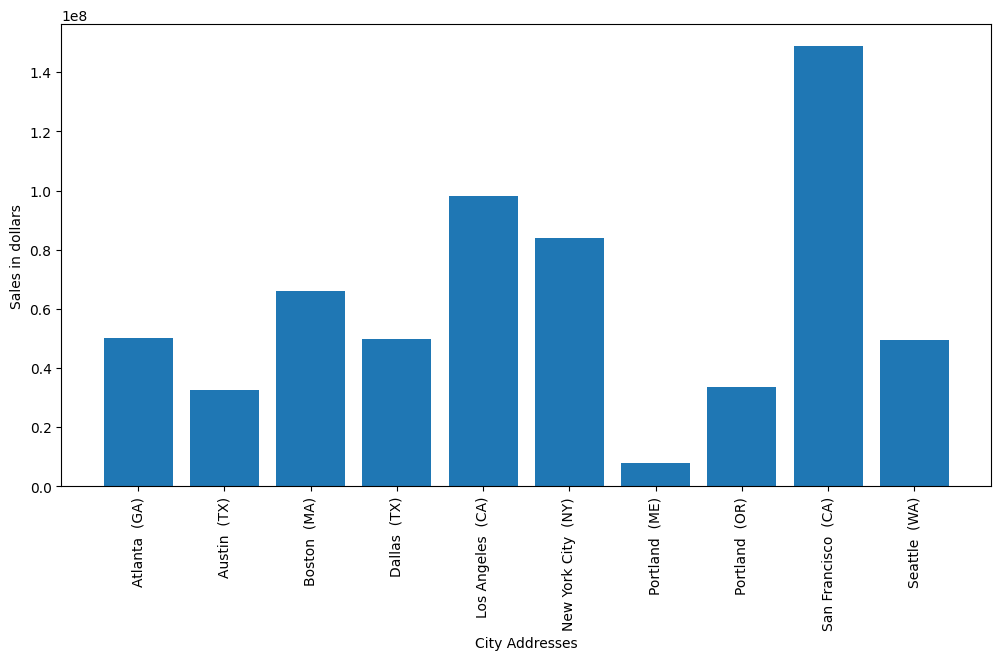

In [12]:
import matplotlib.pyplot as plt

city_data = merged_df['City'].unique()
sales_data = merged_df.groupby('City')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.bar(sales_data.index, sales_data)
plt.xlabel('City Addresses')
plt.ylabel('Sales in dollars')
plt.xticks(rotation='vertical')
plt.show()


### What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:

merged_df["Order Date"]=pd.to_datetime(merged_df["Order Date"])
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [21]:
merged_df["Hours"]=merged_df["Order Date"].dt.hour
merged_df["Minutes"]=merged_df["Order Date"].dt.minute
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\3535561385.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  hour_data=[hour for hour, df in merged_df.groupby(["Hours"])]


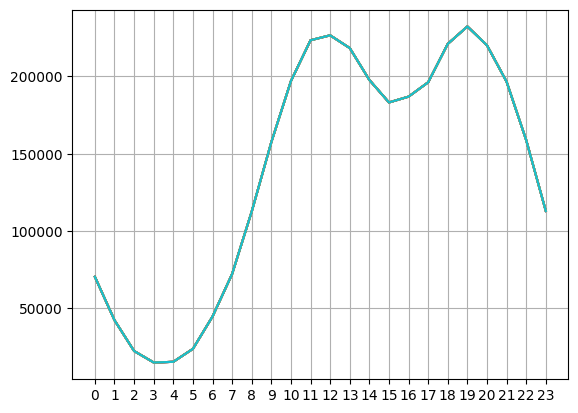

In [26]:
hour_data=[hour for hour, df in merged_df.groupby(["Hours"])]


plt.plot(hour_data, merged_df.groupby(["Hours"]).count())
plt.xticks(hour_data)
plt.grid()
plt.show()


In [ ]:
#the best time would be around 11 am and 7 pm.


###  What products are most often sold together?

In [ ]:
df = merged_df[merged_df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 3366711
('Lightning Charging Cable', 'Lightning Charging Cable') 3331170
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 3173625
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 3159621
('Wired Headphones', 'Wired Headphones') 2900286
('Apple Airpods Headphones', 'Apple Airpods Headphones') 2386773
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 2047473
('27in FHD Monitor', '27in FHD Monitor') 1151487
('iPhone', 'iPhone') 1047474
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 954810


### What product sold the most? Why do you think it sold the most?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\589814601.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


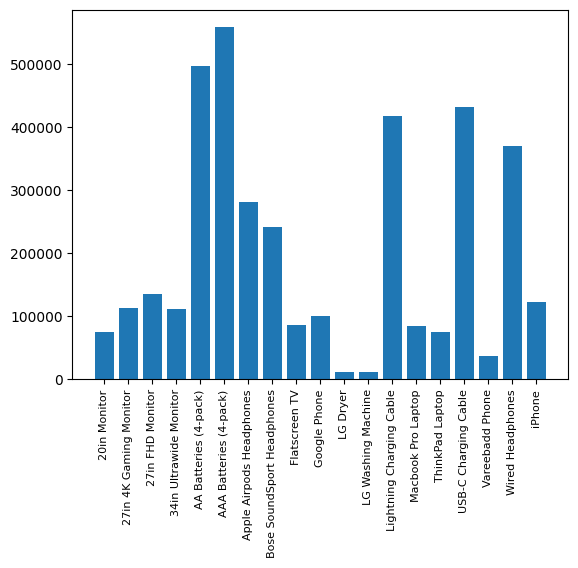

In [30]:
product_group = merged_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\5720485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = merged_df.groupby('Product').mean()['Price Each']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\5720485.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2404\5720485.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


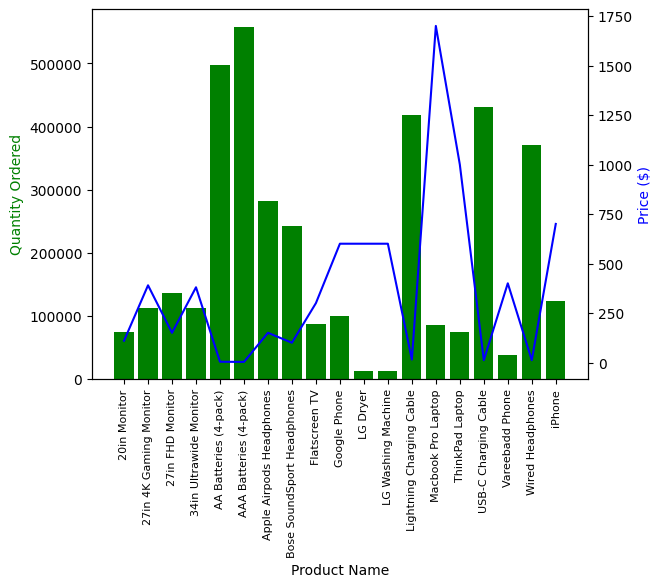

In [31]:
prices = merged_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()